In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.graph import SpectralClustering
from clustertools.models.density import MeanShift, plot_kde
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')
dataset = [spiral, aggr, compound, fuzzy, pathbased]

In [18]:
def computational_complexity(datapoints, data):
    time = np.zeros((5, np.shape(datapoints)[0]))
    #2 dimensions only for now
    for i,nbr in enumerate(datapoints):
        #fuzzy c means
        start_time = timer()
        alg = FuzzyCMeans(data[np.random.randint(1,  np.shape(data)[0], nbr),:], c=4, verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[0,i]=time_taken 
        #mean shift
        start_time = timer()
        alg = MeanShift(data[np.random.randint(1,  np.shape(data)[0], nbr),:], verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[1,i]=time_taken 
        #k means
        start_time = timer()
        alg = KMeans(data[np.random.randint(1,  np.shape(data)[0], nbr),:],4, verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[2,i]=time_taken 
        #RegSpace
        start_time = timer()
        alg = Regspace(data[np.random.randint(1,  np.shape(data)[0], nbr),:],10,.3, verbose=False)
        alg.fit()
        time_taken = timer() - start_time
        time[3,i]=time_taken 
        #Spectral Clustering
        if nbr<2000:
            start_time = timer()
            alg = SpectralClustering(data[np.random.randint(1,  np.shape(data)[0], nbr),:],5,similarity_measure='gaussian',bandwidth=.3,laplacian='normalized', verbose=False)
            alg.fit()
            time_taken = timer() - start_time
            time[4,i]=time_taken
        else: 
            time[4,i]=float('nan')
        #dbscan
        #consensus clustering
        #affinity
        #hierarchical
        
        
    method_label = ['Fuzzy C-Means', 'Mean Shift', 'K-Means','RegSpace','Spectral Clustering']                          
    return time,  method_label       

In [19]:
birch3=load_birch3_data(scale = 'True')
data= birch3[:5100,:2]
datapoints = np.arange(0, np.shape(data)[0], 500)[1:]

time, method_label = computational_complexity(datapoints, data)
np.save('time', time)
np.save('method', method_label)   # X is an array

Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem


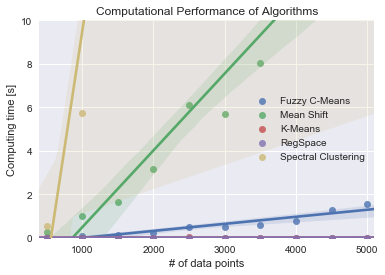

In [20]:
for i in range(len(method_label)):
    sns.regplot(x=datapoints, y=time[i,:],  label=method_label[i])
    #sns.regplot(x=datapoints, y=time[i,:], ax = axarr[1],  label=method_label[i])

plt.gca().axis([min(datapoints)-100, max(datapoints)+100, 0, 10])#,ax = axarr[0])
plt.gca().set_xlabel('# of data points')
plt.gca().set_ylabel('Computing time [s]')
plt.title('Computational Performance of Algorithms')
plt.legend()

#export data into another notebook

nan